In [3]:
import pandas as pd
df = pd.read_csv("toy_molecules_extended.csv")
df.head()


,smiles,name,logP,mw,canonical_smiles,tpsa,hbd,hba,rotatable_bonds
0,c1ccccc1,benzene,1.68660,78.114,c1ccccc1,0.00,0,0,0
1,Cc1ccccc1,toluene,1.99502,92.141,Cc1ccccc1,0.00,0,0,0
2,c1ccc(cc1)O,phenol,1.39220,94.113,Oc1ccccc1,20.23,1,1,0
3,CCO,ethanol,-0.00140,46.069,CCO,20.23,1,1,0
4,CC(=O)O,acetic_acid,0.09090,60.052,CC(=O)O,37.30,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   smiles            10 non-null     object 
 1   name              10 non-null     object 
 2   logP              10 non-null     float64
 3   mw                10 non-null     float64
 4   canonical_smiles  10 non-null     object 
 5   tpsa              10 non-null     float64
 6   hbd               10 non-null     int64  
 7   hba               10 non-null     int64  
 8   rotatable_bonds   10 non-null     int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 848.0+ bytes


In [5]:
import pandas as pd

df = pd.read_csv("toy_molecules_extended.csv")

# Features we'll use to predict logP
feature_cols = ["mw", "tpsa", "hbd", "hba", "rotatable_bonds"]

X = df[feature_cols]
y = df["logP"]

X.head(10), y.head(10)


(        mw   tpsa  hbd  hba  rotatable_bonds
 0   78.114   0.00    0    0                0
 1   92.141   0.00    0    0                0
 2   94.113  20.23    1    1                0
 3   46.069  20.23    1    1                0
 4   60.052  37.30    1    1                0
 5  101.193   3.24    0    1                3
 6   88.106  26.30    0    2                1
 7   60.096  20.23    1    1                0
 8   58.124   0.00    0    0                1
 9   58.124   0.00    0    0                0,
 0    1.68660
 1    1.99502
 2    1.39220
 3   -0.00140
 4    0.09090
 5    1.34810
 6    0.56940
 7    0.38710
 8    1.80640
 9    1.66230
 Name: logP, dtype: float64)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Train/test split — 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate with MAE (mean absolute error)
mae = mean_absolute_error(y_test, y_pred)
mae


0.33495616666666783

Matplotlib is building the font cache; this may take a moment.


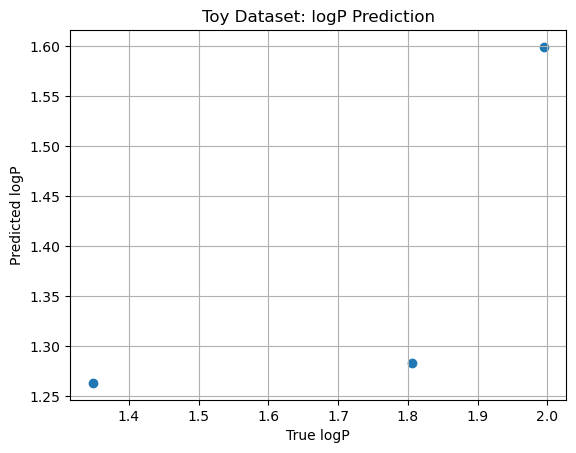

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True logP")
plt.ylabel("Predicted logP")
plt.title("Toy Dataset: logP Prediction")
plt.grid(True)
plt.show()


In [1]:
from rdkit import Chem

# A built-in set of 50 diverse, drug-like SMILES
smiles_list = [
    "CCO", "CCCC", "c1ccccc1", "CCN(CC)CC", "CCOC(=O)C", "O=C(O)C",
    "CC(C)O", "CC(C)C", "CC(C)(C)O", "CCOC", "CCS", "CCCl", "CCCBr",
    "CC(C)CN", "CNC", "COC", "CC(O)C", "CC(=O)C", "OCCO", "CC(C)(C)N",
    "c1ccc(cc1)O", "c1ccc(cc1)N", "c1ccc(cc1)Cl", "c1ccc(cc1)Br",
    "c1ccc(cc1)C", "c1ccc(cc1)F", "c1ccc(cc1)I", "CC1=CC=CC=C1",
    "Cn1cccc1", "CCN(CC)C", "Nc1ccccc1", "Oc1ccccc1", "Cc1ccccc1",
    "S=C=O", "CS(=O)C", "CC(=S)N", "NC(=O)C", "CCNCC", "CCOCN",
    "CCSCC", "CCC(=O)O", "CNC(=O)C", "COC(=O)C", "CCC(=O)N",
    "CC(CO)O", "CC(N)C", "OCCN", "CCC(O)C"
]

len(smiles_list)


48

In [2]:
import pandas as pd

df_big = pd.DataFrame({
    "smiles": smiles_list,
    "name": [f"mol_{i}" for i in range(len(smiles_list))]
})

df_big.head()


,smiles,name
0,CCO,mol_0
1,CCCC,mol_1
2,c1ccccc1,mol_2
3,CCN(CC)CC,mol_3
4,CCOC(=O)C,mol_4


In [3]:
from chemml.properties import (
    compute_logp,
    compute_mw,
    compute_canonical_smiles,
    compute_tpsa,
    compute_hbd,
    compute_hba,
    compute_rotatable_bonds
)

df_big["logP"] = df_big["smiles"].apply(compute_logp)
df_big["mw"] = df_big["smiles"].apply(compute_mw)
df_big["canonical_smiles"] = df_big["smiles"].apply(compute_canonical_smiles)
df_big["tpsa"] = df_big["smiles"].apply(compute_tpsa)
df_big["hbd"] = df_big["smiles"].apply(compute_hbd)
df_big["hba"] = df_big["smiles"].apply(compute_hba)
df_big["rotatable_bonds"] = df_big["smiles"].apply(compute_rotatable_bonds)



In [4]:
df_big = df_big.dropna()
df_big.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   smiles            48 non-null     object 
 1   name              48 non-null     object 
 2   logP              48 non-null     float64
 3   mw                48 non-null     float64
 4   canonical_smiles  48 non-null     object 
 5   tpsa              48 non-null     float64
 6   hbd               48 non-null     int64  
 7   hba               48 non-null     int64  
 8   rotatable_bonds   48 non-null     int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.5+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

feature_cols = ["mw", "tpsa", "hbd", "hba", "rotatable_bonds"]

X = df_big[feature_cols]
y = df_big["logP"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae


0.24741263888888954

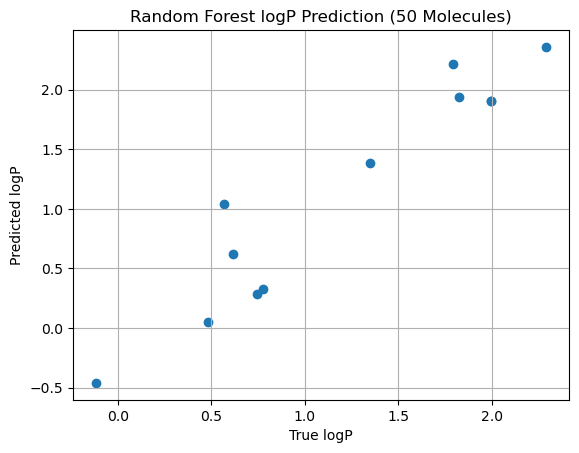

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True logP")
plt.ylabel("Predicted logP")
plt.title("Random Forest logP Prediction (50 Molecules)")
plt.grid(True)
plt.show()
